## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [115]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [116]:
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [117]:
df.shape[0]

294478

c. The number of unique users in the dataset.

In [118]:
df['user_id'].nunique()

290584

d. The proportion of users converted.

In [119]:
df['converted'].mean()

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't line up.

In [120]:
new_control = df[(df.landing_page == "new_page") & (df.group == "control")].shape[0]
old_treatment = df[(df.landing_page == "old_page") & (df.group == "treatment")].shape[0]
print('Number of rows with combination control group and new page: {}'.format(new_control))
print('Number of rows with combination treatment group and old page: {}'.format(old_treatment))
print('Total number of times new page and group don"t line up: {}'.format(new_control + old_treatment))

Number of rows with combination control group and new page: 1928
Number of rows with combination treatment group and old page: 1965
Total number of times new page and group don"t line up: 3893


f. Do any of the rows have missing values?

In [121]:
df.isnull().sum()
#There are no rows with missing values

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [122]:
df2 = df.drop(df[(df.landing_page == "new_page") & (df.group == "control") | (df.landing_page == "old_page") & (df.group == "treatment")].index)

In [123]:
#Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [124]:
df2['user_id'].nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [125]:
df2[df2['user_id'].duplicated()]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


c. What is the row information for the repeat **user_id**? 

In [126]:
df.query('user_id == 773192')

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [127]:
df2 = df2.drop_duplicates(['user_id'],keep='first')

`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [128]:
df2['converted'].mean()

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [129]:
#Number of individuals in control group that converted
control_converted = df2[(df2.group == "control") & (df2.converted == 1)].shape[0]
#Total number of individuals in control group
total_control = df2[(df2.group == "control")].shape[0]
p_control_convert = control_converted/total_control
p_control_convert

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [157]:
#Number of individuals in treatment group that converted
treatment_converted = df2[(df2.group == "treatment") & (df2.converted == 1)].shape[0]
#Total number of individuals in treatment group
total_treatment = df2[(df2.group == "treatment")].shape[0]
p_treatment_convert = treatment_converted/total_treatment
p_treatment_convert

0.11880806551510564

In [131]:
#Difference between probability of conversion in treatment and control group
obs_diff = p_treatment_convert - p_control_convert
obs_diff

-0.0015782389853555567

d. What is the probability that an individual received the new page?

In [132]:
df2['landing_page'].value_counts(normalize=True)

new_page    0.500062
old_page    0.499938
Name: landing_page, dtype: float64

e. Use the results in the previous two portions of this question to suggest if you think there is evidence that one page leads to more conversions?  Write your response below.

**At this moment, I do not have evidence that either the old or the new page leads to more conversions. The probability of conversion in the control group is a little higher, although the difference with the treatment group is very small (-0.0016).**

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

$$H_0: p_{new} - p_{old} <= 0$$


$$H_1: p_{new} - p_{old} > 0$$

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [133]:
#Under the null hypothesis, we assume the converted rates for the old and new pages to be the same
df2.converted.mean()

0.11959708724499628

b. What is the **convert rate** for $p_{old}$ under the null? <br>

In [134]:
df2.converted.mean()

0.11959708724499628

c. What is $n_{new}$?

d. What is $n_{old}$?

In [135]:
df2['landing_page'].value_counts()

new_page    145310
old_page    145274
Name: landing_page, dtype: int64

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [136]:
#Use binomial because there are only two possible outcomes
#Code = np.random.binomial(n, p, size) with n being possible outcomes, p being the convert rate of p_new under the null 
#hypothesis and size the number of times an individual landed on the new page. 
new_page_converted = np.random.binomial(1, 0.1196, 145310)

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [137]:
#Use binomial because there are only two possible outcomes
#Code = np.random.binomial(n, p, size) with n being possible outcomes, p being the convert rate of p_old under the null 
#hypothesis and size the number of times an individual landed on the old page. 
old_page_converted = np.random.binomial(1, 0.1196, 145274)

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [138]:
new_page_converted.mean() - old_page_converted.mean()

0.0015257193100701588

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in **p_diffs**.

In [139]:
#Perform same steps as before but now for a simulated sampling distribution
p_diffs = []
for _ in range(10000):
    new_page_converted = np.random.binomial(1, 0.1196, 145310)
    old_page_converted = np.random.binomial(1, 0.1196, 145274)
    new_page_p = new_page_converted.mean()
    old_page_p = old_page_converted.mean()
    p_diffs.append(new_page_p - old_page_p)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

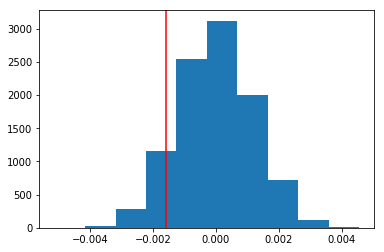

In [140]:
#Plot histogram for p_diffs. The red line shows the observed difference between the mean conversion rate for the
#new page and the conversion rate for the old page. 
plt.hist(p_diffs);
plt.axvline(obs_diff, color='red')

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [141]:
p_diffs = np.array(p_diffs)
(p_diffs > obs_diff).sum()/len(p_diffs)

0.9079

k. In words, explain what you just computed in part **j**.  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**We just computed the p-value, which shows how likely it is to find the differences in the conversion rates between the old and the new page, assuming a true null hypothesis (which is: the old page does equally good or better than the new page in terms of conversion rate). The p-value is 0.91, which means that it is very likely to find these results when the null hypothesis is true. Therefore, we fail to reject the null hypothesis, which means that there is no evidence that the new page will do better in terms of conversion rate.**

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [159]:
import statsmodels.api as sm
from scipy.stats import norm

#Number of conversions for old page
convert_old = df2[(df2.landing_page == "old_page") & (df2.converted == 1)].shape[0]
#Number of conversions for new page 
convert_new = df2[(df2.landing_page == "new_page") & (df2.converted == 1)].shape[0]
#Number of rows where landing page is old page
n_old = df2[df2.landing_page == "old_page"].shape[0]
#Number of rows where landing page is new page
n_new = df2[df2.landing_page == "new_page"].shape[0]

print(convert_old, convert_new, n_old, n_new)

17489 17264 145274 145310


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [160]:
z_score, p_value = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new], alternative='smaller')
print("Z-score: {}, p_value: {}".format(z_score, p_value))

Z-score: 1.3109241984234394, p_value: 0.9050583127590245


In [161]:
from scipy.stats import norm

norm.ppf(1-0.05)
#Tells us what our critical value at 95% confidence is (one-tailed)

1.6448536269514722

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**In order to reject the null hypothesis that states that the conversion rate is equal or higher for the old page, we had to find a critical Z-score larger than 1.64 at a 95% confidence interval. However, the Z-score we found was 1.31 which falls within the 95% confidence interval, with a p-value of 0.905. Therefore, we fail to reject the null hypothesis.**

**We conducted a one tailed Z-test because we were only interested if the new page generated more conversion than the old page.**

**The p-value found with use of the Z-test matches the p-value found by taking samples from the binomial distribution using Python's random library (both approximately 0.91), which suggests that the bootstrapping method can be a good alternative for hypothesis testing compared to the more traditional statistical tests.**

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Logistic regression is used in situations where there are only two possible outcomes, in this case: to convert or not.**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a colun for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [162]:
#Add intercept column
df2['intercept'] = 1
#Create dummy variables for "group"
df2[['alt', 'ab_page']] = pd.get_dummies(df2['group'])
#Drop one dummy variable column 
df2 = df2.drop('alt', axis=1)

c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [163]:
logit_mod = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])
results = logit_mod.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Mon, 09 Apr 2018   Pseudo R-squ.:               8.077e-06
Time:                        14:05:02   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

d. Provide the summary of your model below, and use it as necessary to answer the following questions.

**The estimated odds that an individual in the treatment group converts is 1.02 times smaller than the corresponding odds for a control group individual. However, a p-value of 0.190 suggests that the page the individual sees is not significant in predicting whether the individual will convert or not.**

In [164]:
#Since the return value coefficient for ab_page is less than one, we take the reciprocal. This returns the value 1.02 
#as mentioned above
np.exp(-0.0150)
1/np.exp(-0.0150)

1.015113064615719

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in the **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

**The p-value associated with ab_page differs from the p-value found in part II because the hypotheses for the logistic regression model are different from Part II. In part II we said that the conversion rate for the new page would be the same or even lower than the old page under the null hypothesis, where the alternative hypothesis stated that the new page would have a higher conversion rate. Therefore, this was a one-tailed test.**

**For the regression approach however, we say that under the null, there is no relation between conversion and the page the users get to see. The alternative hypothesis states that there is a relation, which makes this hypothesis non directional. Or:**

$$H_0: \beta_{1} = 0$$


$$H_1: \beta_{1} \neq 0$$

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**If we would only look if variable ab_test influences whether or not an individual converts, we might overlook other variables that are -contrary to ab_test- significant in predicting conversion, so it is a good idea to consider other factors in the regression model.**

**However, adding more variables might also introduce multicollinearity to your model, which could make hypothesis testing unreliable.**

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [148]:
countries = pd.read_csv('countries.csv')
countries.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [149]:
merged = df2.set_index('user_id').join(countries.set_index('user_id'))
merged.head()

,timestamp,group,landing_page,converted,intercept,ab_page,country
user_id,,,,,,,
851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US
804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US
661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US
853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US
864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,US


In [165]:
#Create dummy variables for "country"
merged[['US', 'UK', 'CA']] = pd.get_dummies(merged['country'])

In [151]:
logit_mod_2 = sm.Logit(merged['converted'], merged[['intercept', 'UK', 'CA']])
results_2 = logit_mod_2.fit()
results_2.summary()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Mon, 09 Apr 2018   Pseudo R-squ.:               1.521e-05
Time:                        13:18:32   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1984
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0375      0.026    -78.364      0.000      -2.088      -1.987
UK             0.0507      0.028      1.786      0.074      -0.005       0.106
CA             0.0408      0.027      1.518      0.129      -0.012       0.093
==============================================================================
"""

**Just like we saw with the ab_page variable, there is no significant relation between the country the individual is coming from and the conversion rate. As you can see, the probability p of observing these results if the null hypothesis is true is fairly large for "UK" and "CA" (as opposed to "US"). Both have a p-value that is higher than 0.05.**

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [154]:
#Create new columns for the interactions US*ab_page, UK*ab_page and CA*ab_page:
merged['US_page'] = merged['US']* merged['ab_page']
merged['UK_page'] = merged['UK']* merged['ab_page']
merged['CA_page'] = merged['CA']* merged['ab_page']

In [166]:
logit_mod_3 = sm.Logit(merged['converted'], merged[['intercept', 'UK_page', 'CA_page']])
results_3 = logit_mod_3.fit()
results_3.summary()

Optimization terminated successfully.
         Current function value: 0.366117
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Mon, 09 Apr 2018   Pseudo R-squ.:               1.082e-05
Time:                        14:11:21   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.3164
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9926      0.008   -252.910      0.000      -2.008      -1.977
UK_page        0.0112      0.018      0.626      0.532      -0.024       0.046
CA_page       -0.0144      0.012     -1.155      0.248      -0.039       0.010
==============================================================================
"""

**There is no significant influence from the newly created interaction term ab_page*country on the conversion rate. The p-values for the variables UK_page and CA_page (as compared to US_page) both have fairly large p-values. Therefore, after bootstrapping, a z-test, and a logistic regression model with different variables and an interaction term, we must conclude that we should not replace the old page by the new page if we want conversion rates to go up.**

<a id='conclusions'></a>
## Conclusions

Congratulations on completing the project! 

### Gather Submission Materials

Once you are satisfied with the status of your Notebook, you should save it in a format that will make it easy for others to read. You can use the __File -> Download as -> HTML (.html)__ menu to save your notebook as an .html file. If you are working locally and get an error about "No module name", then open a terminal and try installing the missing module using `pip install <module_name>` (don't include the "<" or ">" or any words following a period in the module name).

You will submit both your original Notebook and an HTML or PDF copy of the Notebook for review. There is no need for you to include any data files with your submission. If you made reference to other websites, books, and other resources to help you in solving tasks in the project, make sure that you document them. It is recommended that you either add a "Resources" section in a Markdown cell at the end of the Notebook report, or you can include a `readme.txt` file documenting your sources.

### Submit the Project

When you're ready, click on the "Submit Project" button to go to the project submission page. You can submit your files as a .zip archive or you can link to a GitHub repository containing your project files. If you go with GitHub, note that your submission will be a snapshot of the linked repository at time of submission. It is recommended that you keep each project in a separate repository to avoid any potential confusion: if a reviewer gets multiple folders representing multiple projects, there might be confusion regarding what project is to be evaluated.

It can take us up to a week to grade the project, but in most cases it is much faster. You will get an email once your submission has been reviewed. If you are having any problems submitting your project or wish to check on the status of your submission, please email us at dataanalyst-project@udacity.com. In the meantime, you should feel free to continue on with your learning journey by continuing on to the next module in the program.